# Linear Regression Model

## Import Essential Libraries

In [7]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Import Data

In [5]:
df = pd.read_csv('datasets/twitch-data-cleaned.csv')
df.head()

,channel,watch_time_minutes,stream_time_minutes,peak_viewers,average_viewers,followers,followers_gained,views_gained,partnered,mature,language,watch_time_hours,stream_time_hours,followers_per_hour,views_per_follower,engagement_rate
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English,1.032694e+08,3587.50,483.570732,53.629351,0.008538
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English,1.015280e+08,3530.75,388.071656,65.470013,0.004823
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese,9.407652e+07,8588.00,119.210410,100.228279,0.006209
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English,6.617197e+07,8629.00,81.583729,151.348098,0.001955
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,6.118333e+07,2061.00,1003.602135,38.192647,0.003312


In [21]:
# use all these features to predict watch_time_minutes
features = ['stream_time_minutes', 'average_viewers', 'peak_viewers', 
            'followers', 'followers_gained', 'views_gained', 
            'mature', 'views_per_follower', 'engagement_rate']

# language needs to be one-hot encoded as it is a categorical var
df_ml = pd.get_dummies(df, columns=['language'], drop_first=True)
df_ml.columns = [col.lower() if col.startswith('language_') else col for col in df_ml.columns]

# filter for features and language columns
lang_columns = [col.lower() for col in df_ml.columns if col.startswith('language_')]
X = df_ml[features + lang_columns].copy()
y = df_ml['watch_time_minutes']

# handle any missing vals
X = X.fillna(X.median())

# now we can perform a train/test split
# 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# scale the features so they each contribute equally
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# evalute linear regression model
y_pred_linear = linear_model.predict(X_test_scaled)
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print(f"Linear Regression Results:")
print(f"R² Score: {r2_linear:.4f}")
print(f"RMSE: {rmse_linear:.2f}")
print(f"MAE: {mae_linear:.2f}")

Linear Regression Results:
R² Score: 0.6536
RMSE: 332317064.43
MAE: 163213427.06


In [35]:
def plot_actual_vs_predicted(model, X_test_scaled, y_test):
  y_pred = model.predict(X_test_scaled)
  
  plt.figure(figsize=(12, 8))
  plt.scatter(y_test, y_pred)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
  plt.xlabel('Actual Watch Time (minutes)')
  plt.ylabel('Predicted Watch Time (minutes)')
  plt.title('Linear Regression: Actual vs Predicted Watch Time', fontsize=14)
  
  # Add performance metrics to plot
  r2 = r2_score(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  plt.annotate(f'R² = {r2:.3f}\nRMSE = {rmse:.0f}', 
                xy=(0.05, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
  
  plt.show()

In [36]:
# Option 2: Coefficient Plot (Feature Importance)
def plot_linear_coefficients(model, feature_names):
  # Get coefficients
  coefficients = pd.DataFrame({
      'Feature': feature_names,
      'Coefficient': model.coef_
  })
  
  # Sort by absolute value
  coefficients['Abs_Coefficient'] = np.abs(coefficients['Coefficient'])
  coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)
  
  # Plot top 15 coefficients
  plt.figure(figsize=(12, 8))
  
  sb.barplot(x='Coefficient', y='Feature', data=coefficients.head(15))
  plt.title('Top 15 Features by Linear Regression Coefficient Magnitude', fontsize=14)
  plt.xlabel('Standardized Coefficient (Impact on Watch Time)', fontsize=12)
  plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)
  plt.grid(axis='x', alpha=0.3)
  plt.show()

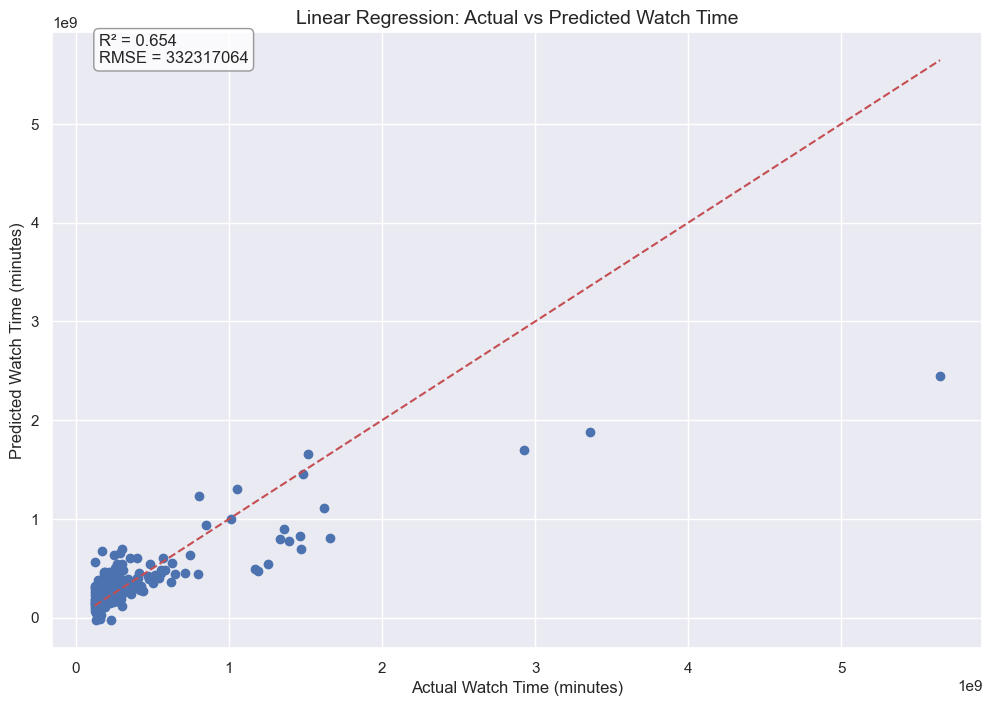

In [37]:
plot_actual_vs_predicted(linear_model, X_test_scaled, y_test)

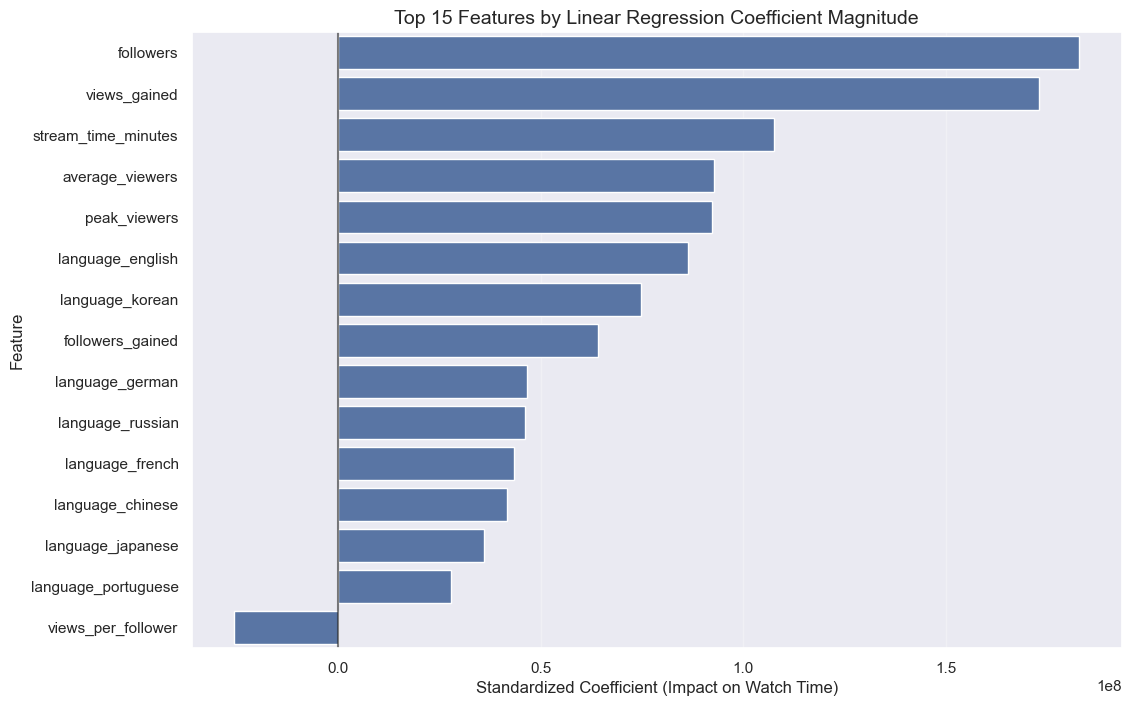

In [38]:
plot_linear_coefficients(linear_model, features + lang_columns)